In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import math
import random

#extracting the current path where code is present
abspath = os.getcwd()
i = ["20newsgroups","artificial"]
csv_dict = {}
data_artificial = {}
data_20news = {}
words_com1 = {}
words_com2 = {}
#determining the complete path of the data to read and extract the information from the csv and txt file.
for j in range(len(i)):
    relative1 = abspath+'\\pp4data\\pp4data\\'+i[j]
    relative2 = '\\index.csv'
    fullpath = relative1+relative2
    with open(fullpath) as csv_file:
        filer = csv.reader(csv_file,quoting=csv.QUOTE_NONNUMERIC)
        csv_dict[i[j]] = [line for line in filer]
    csv_dict[i[j]] = np.array(csv_dict[i[j]])
    array_fn =  csv_dict[i[j]]
    for k in array_fn[:,0]:
        k = str(int(k))
        relative2 = '\\'+k
        fullpath = relative1+relative2
        if i[j]=="20newsgroups":
            with open(fullpath) as data_set1:
                words_com1[int(k)] =[word for line in data_set1 for word in line.split()]
        else:
            with open(fullpath) as data_set2:
                words_com2[int(k)] =[word for line in data_set2 for word in line.split()] 


In [9]:
#Task 1
def data_arrange(data_dict,topic_list):
    vocab_list = []
    doc_list = list(data_dict.keys())
    words_idx = {}
#data_dit which has all data in dictionary format with keys as documents id and values as complete words of the respective doc.
#forming vocabulary from that data dict and also simultaneously assigning the topics randomly from the topic list provided
#Also forming the index for each word of each doc in for of doc_id.word_index. example 1.1 means second word of the document 1.
    for i in data_dict.keys():
        k=i
        l=0
        for j in data_dict[i]:
            if j not in vocab_list:
                vocab_list.append(j)
            topic = random.choice(topic_list)
            words_idx[str(k)+"."+str(l)] = topic
            l+=1

    #forming numpy 2d array of kv matrix with topic list as rows and vocabulary as columns
    #forming numpy 2d array of dk matrix with document id as rows and topic list as columns
    kv_matrix = np.array(np.zeros(len(topic_list)*len(vocab_list)))
    kv_matrix = np.reshape(kv_matrix,(-1,len(vocab_list)))
    dk_matrix = np.array(np.zeros(len(doc_list)*len(topic_list)))
    dk_matrix = np.reshape(dk_matrix,(-1,len(topic_list)))    

    #updating the kv matrix with respective counts of each word in each topic.
    #updating the dk matrix with count of each topic in each document.
    for i in words_idx.keys():
        idx = i.split('.')
        doc_words = data_dict[int(idx[0])]
        word = doc_words[int(idx[1])]
        vocab_idx = vocab_list.index(word)
        topic = words_idx[i]
        doc_idx = int(idx[0])-1
        kv_matrix[topic,vocab_idx] = (kv_matrix[topic,vocab_idx])+1
        dk_matrix[doc_idx,topic] = (dk_matrix[doc_idx,topic])+1

    #sampling using gibbs sampling function and determining the final kv and dk matrix
    #Determining the getting the dictionary with keys as index of all word of every doc and corresponding topic latest assigned.
    final_kv,final_dk,final_wrd_idx = gibbs_samp(data_dict,kv_matrix,dk_matrix,words_idx,vocab_list,topic_list)
    
    return final_kv,final_dk,final_wrd_idx,vocab_list

def gibbs_samp(data_dit,kv_mat,dk_mat,wd_id,vcb_lst,tpc_list):

    #calculating the K and V values which is number of topics and unique words respectively.
    cap_v = len(vcb_lst)
    cap_k = len(tpc_list)
    #initialising the alpha and beta values
    beta = 0.01
    alpha = 5/cap_k
    #initialising the K array with zero values
    prob_tpc = np.zeros(len(tpc_list))
    wrds_idx = list(wd_id.keys())

    for i in range(0,500):
        #for each iteration randomly permutating the order of words which are executed.
        rndm_id = np.random.permutation(wrds_idx)
        #for each word resampling the topic by calculating the probability value of each topic for specific location.
        #using weighed method determining the topic for that specific word and reupdating the respective matrices.
        for j in rndm_id:
            indx = j.split('.')
            doc_words = data_dit[int(indx[0])]
            word = doc_words[int(indx[1])]
            vcb_idx = vcb_lst.index(word)
            tpc = wd_id[j]
            kv_mat[tpc,vcb_idx] = (kv_mat[tpc,vcb_idx])-1
            dc_idx = int(indx[0])-1
            dk_mat[dc_idx,tpc] = (dk_mat[dc_idx,tpc])-1
            #calculating probability of each topic for a specific word.
            for k in  range(len(prob_tpc)):
                term1 = (kv_mat[k,vcb_idx]+beta)/((cap_v*beta)+(sum(kv_mat[k,:])))
                term2 = (dk_mat[dc_idx,k]+alpha)/((cap_k*alpha)+(sum(dk_mat[dc_idx,:])))
                prob_tpc[k] = (term1*term2)
            tot_prob = sum(prob_tpc)
            #normalising the calculated probability
            for l in range(len(prob_tpc)):
                prob_tpc[l] = prob_tpc[l]/tot_prob
            m_tpc = random.choices(tpc_list,weights=prob_tpc)
            wd_id[j] = m_tpc
            kv_mat[m_tpc,vcb_idx] = (kv_mat[m_tpc,vcb_idx])+1
            dk_mat[dc_idx,m_tpc] = (dk_mat[dc_idx,m_tpc])+1
    return kv_mat,dk_mat,wd_id
            

t2 = list(range(0,20))
kv_matrx2,dk_matrx2,wrds_idx2,vocb_lst2 = data_arrange(words_com1,t2)

print(kv_matrx2)
print(dk_matrx2)
print(vocb_lst2)
print(wrds_idx2)
         

[[ 0.  0.  1. ...  0.  0.  2.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  4.  8. ...  0.  0.  0.]
 [14.  0.  0. ...  0.  0.  0.]]
[[0. 0. 0. ... 0. 3. 1.]
 [6. 1. 2. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 3. 0.]
 ...
 [1. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 7. 5. 0.]]
['info', 'companies', 'market', 'cost', 'email', 'uiuc', 'edu', 'service', 'bmw', 'writes', 'article', 'apr', 'tool', 'lights', 'come', 'back', 'fact', 'europe', 'case', 'buy', 'used', 'works', 'start', 'car', 'drive', 'time', 'expect', 'people', 'oil', 'change', 'changing', 'miles', 'big', 'thought', 'net', 'question', 'buying', 'important', 'reason', 'stop', 'light', 'cars', 'engine', 'good', 'life', 'don', 'servicing', 'bought', 'months', 'brake', 'air', 'fuel', 'transmission', 'things', 'today', 'bad', 'university', 'research', 'group', 'current', 'camaro', 'idea', 'wanted', 'throw', 'taurus', 'george', 'howell', 'ford', 'american', 'org', 

In [37]:
caps_k = len(t2)
alpha = 5/caps_k
wrd_tpc = []
#extracting the 5 words that have high frequency compared to other words of a specific topic for all 20 topics.
for y in range (len(kv_matrx2)):
    topic_wrd = kv_matrx2[y]
    sorted_array = np.argsort(topic_wrd)[::-1][:5]
    smpl_lst = []
    for j in sorted_array:
        smpl_lst.append(vocb_lst2[j])
    wrd_tpc.append(smpl_lst)
#writing the extracted information in csv file format
file = open('topicswords.csv', 'w+', newline ='')
with file:   
    write = csv.writer(file)
    write.writerows(wrd_tpc)

In [38]:
#Task 2

def data_task2(topic_lst,data_dit,vcb_dit,dk_matr,csv_dit):
#from dk matrix forming the representation matrix by using the formula given in the problem statement
    caps_k = len(topic_lst)
    alpha = 5/caps_k
    doc1 = list(data_dit.keys())
    rprsnt = np.zeros(len(doc1)*len(topic_lst))
    rprsnt = np.reshape(rprsnt,(-1,len(topic_lst))) 
    label_list = []
    data_list = []
    for d in range(len(doc1)):
        wrds = np.zeros(len(vcb_dit))    
        summation = sum(dk_matr[d,:])
        for j in range(len(topic_lst)):
            rprsnt[d,j] = (dk_matr[d,j]+alpha)/((caps_k*alpha)+summation)
        doc_wrds = data_dit[d+1]
        for j in doc_wrds:
            wrd_idx = vcb_dit.index(j)
            wrds[wrd_idx] = wrds[wrd_idx]+1
        data_list.append(wrds) 
    for i in csv_dit:
        label_list.append(i[1])
    label_list = np.array(label_list)
    data_list = np.array(data_list)

    return rprsnt,data_list,label_list

rprsnt1,d_1,l_1 = data_task2(t2,words_com1,vocb_lst2,dk_matrx2,csv_dict["20newsgroups"])


In [39]:
def wmap_det(data,label):
    d_t = data.transpose()
    wn = np.zeros(len(d_t))
    iden = np.identity(len(d_t))
    a_id = np.dot(alpha,iden)
    wn1 = wn
    n=0
    #initialising the wn as zero vector
    while (True):
        num = np.linalg.norm((wn1-wn),ord = 2)
        den = np.linalg.norm(wn,ord=2)
        chk = num/den
        #checking whether the normalized condition or the no of steps as explained in question is met as stopping criteria
        if (((chk < (10**-3)) | n>=100)):
            break
        #assigning the previous cycle wn1 as this cycle wn to again iterate for wn1
        wn = wn1
        y = np.array(np.zeros(len(data)))
        yi_r = np.array(np.zeros(len(data)))
        n += 1
        for i in range (len(data)):
            ai = np.dot(data[i],wn)
            yi = 1/(1+(np.exp(-ai)))
            y[i] = yi
            yi_r[i] = yi*(1-yi) 
        r = np.diag(yi_r)
        wn1_1 = np.dot(d_t,r)
        wn1_1 = np.dot(wn1_1,data)
        wn1_1 = a_id+wn1_1
        wn1_1 = np.linalg.inv(wn1_1)
        wn1_2 = y-label
        wn1_2 = np.dot(d_t,wn1_2)
        wn1_2_2 = np.dot(alpha,wn)
        wn1_2 = wn1_2+wn1_2_2
        wn1 = np.dot(wn1_1,wn1_2)
        wn1 = wn-wn1
    return(wn1)

#computing the w and sn values based on the training data and label
def bay_mod_trn(trn_d,trn_l):
    wmap = wmap_det(trn_d,trn_l)
    y = np.array(np.zeros(len(trn_d)))
    trn_dt = trn_d.transpose()
    sn_2 = 0 
    iden = np.identity(len(trn_dt))
    sn_1 = np.dot(1/alpha,iden)
    for i in range (len(trn_d)):
        ai = np.dot(trn_d[i],wmap)
        yi = 1/(1+(np.exp(-ai)))
        y[i] = yi
        val_1 = yi*(1-yi)
        tr = trn_d[i].transpose()
        val_2 = np.dot(trn_d[i],tr)
        val = val_1*val_2
        sn_2 = sn_2 + val
    sn = sn_1+sn_2
    return (wmap,sn)

#computing the weights and sn based on training data and evaluating the error rate by using that weights and sn on test data
def bay_mod(tr_d,tr_l,te_d,te_l):
    tr_d = np.insert(tr_d,0,1,axis = 1)
    te_d = np.insert(te_d,0,1,axis = 1)
    wn,sn = bay_mod_trn(tr_d,tr_l)
    wn_t = wn.transpose()
    err = 0
    crt = 0
    for i in range(len(te_d)):
        mu_a = np.dot(te_d[i],wn)
        sigma_sq_a = np.dot(te_d[i],sn)
        te_tr = te_d[i].transpose()
        sigma_sq_a = np.dot(sigma_sq_a,te_tr)
        k_si_sq_a = ((1+((np.pi*sigma_sq_a)/8))**(-1/2))
        sigma = k_si_sq_a*mu_a
        pr_ci = 1/(1+(np.exp(-sigma)))
        if (pr_ci >= (1/2)):
            pred_l = 1
        else:
            pred_l = 0
        if pred_l == te_l[i]:
            crt = crt+1
        else:
            err = err+1
    er_rt = err/len(te_l)
    return (er_rt)


In [53]:
import time
#randomly selecting 2/3rd of data for training and calculating the error rate for various training size 
def main_fn(data,label):
    train_set = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    N = len(data)
    tr = int((2/3)*len(data))
    tst = N-tr
    tr_idx = np.random.choice(np.arange(len(data)), tr, replace=False)
    tr_d = data[tr_idx]
    tr_l = label[tr_idx]
    tst_idx = np.array(np.zeros(tst))
    tst_idx = tst_idx.astype(int)
    j=0
    for i in range(len(data)):
        if i not in tr_idx:
            tst_idx[j] = int(i)
            j += 1
    tst_d = data[tst_idx]
    tst_l = label[tst_idx]
    tst_er_bay = {}

    for i in train_set:
        bay_er = bay_mod(tr_d[0:(int(math.ceil(len(tr_d)*i))),0:(len(tr_d[1]))],tr_l[0:(int(math.ceil(len(tr_l)*i)))],tst_d,tst_l)
        bay_er = round(bay_er,4)
        tst_er_bay[i] = bay_er
    return tst_er_bay
#repeating the main function computing for 30 times
times = 30
alpha = 0.01
rprsnt1,d_1,l_1 = data_task2(t2,words_com1,vocb_lst2,dk_matrx2,csv_dict["20newsgroups"])

err_mat_bag_bay = {}
err_mat_tpc_bay = {}

runtime_diff = np.array(np.zeros(30*2))
runtime_diff = np.reshape(runtime_diff,(-1,2))    

for i in range(1,times+1):
    init1 = time.time()
    err_mat_bag_bay[i] = main_fn(d_1,l_1)
    init2 = time.time()
    err_mat_tpc_bay[i] = main_fn(rprsnt1,l_1)
    init3 = time.time()
    runtime_diff[i-1,0] = init2-init1
    runtime_diff[i-1,1] = init3-init2
    

C:\Users\DELL\AppData\Local\Temp/ipykernel_17144/1105828824.py:12: RuntimeWarning: invalid value encountered in double_scalars
  chk = num/den
C:\Users\DELL\AppData\Local\Temp/ipykernel_17144/1105828824.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  chk = num/den


In [58]:
#calculating runtime for bag of words vs LDA data set model
mean = np.mean(runtime_diff,axis = 0)
print(mean)

[11.31933121  0.77915858]


In [59]:
print("Error rate for bag of words data set")
print(err_mat_bag_bay,'\n')
print("Error rate for LDA model data set")
print(err_mat_tpc_bay)

Error rate for bag of words data set
{1: {0.1: 0.1642, 0.2: 0.1791, 0.3: 0.0746, 0.4: 0.0746, 0.5: 0.0746, 0.6: 0.0597, 0.7: 0.0597, 0.8: 0.0299, 0.9: 0.0448, 1: 0.0299}, 2: {0.1: 0.1791, 0.2: 0.1791, 0.3: 0.1343, 0.4: 0.0746, 0.5: 0.0746, 0.6: 0.0746, 0.7: 0.0746, 0.8: 0.0746, 0.9: 0.0746, 1: 0.0746}, 3: {0.1: 0.1045, 0.2: 0.0896, 0.3: 0.0597, 0.4: 0.0597, 0.5: 0.0299, 0.6: 0.0448, 0.7: 0.0448, 0.8: 0.0299, 0.9: 0.0597, 1: 0.0597}, 4: {0.1: 0.1791, 0.2: 0.194, 0.3: 0.1493, 0.4: 0.1045, 0.5: 0.0746, 0.6: 0.0299, 0.7: 0.0597, 0.8: 0.0597, 0.9: 0.0299, 1: 0.0597}, 5: {0.1: 0.4925, 0.2: 0.2239, 0.3: 0.194, 0.4: 0.1194, 0.5: 0.1045, 0.6: 0.1343, 0.7: 0.1343, 0.8: 0.1194, 0.9: 0.1194, 1: 0.0896}, 6: {0.1: 0.2537, 0.2: 0.194, 0.3: 0.1493, 0.4: 0.0746, 0.5: 0.0746, 0.6: 0.0746, 0.7: 0.0746, 0.8: 0.0746, 0.9: 0.0597, 1: 0.0448}, 7: {0.1: 0.2537, 0.2: 0.2836, 0.3: 0.2388, 0.4: 0.1343, 0.5: 0.0746, 0.6: 0.1045, 0.7: 0.1045, 0.8: 0.0746, 0.9: 0.0896, 1: 0.0896}, 8: {0.1: 0.1194, 0.2: 0.2388, 0.3:

For data set 20newsgroups


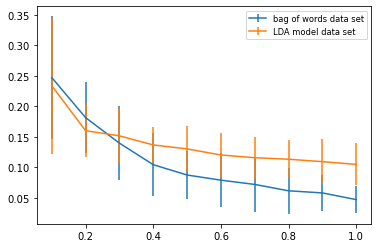

In [60]:
#calculating the mean and standard deviation of the error rate for different training size computed for 30 runs.
def mean_sd_calc(dict_data):
    fin_mat = np.array(np.zeros(10))
    fin_mat = np.expand_dims(fin_mat, axis=0)
    l = 0
    for i in dict_data.keys():
        itr = dict_data[i]
        temp = np.array(np.zeros(10))
        k = 0
        for j in itr.keys():
            temp[k] = itr[j]
            k += 1    
        temp = np.expand_dims(temp, axis=0)
        fin_mat = np.append(fin_mat,temp,axis=0)
        l += 1
    fin_mat = np.delete(fin_mat, (0), axis=0)
    mean = 0
    mean = np.mean(fin_mat,axis = 0)
    sd = np.std(fin_mat, axis=0)        
    return mean,sd

mn1,sn1 = mean_sd_calc(err_mat_bag_bay)
mn2,sn2 = mean_sd_calc(err_mat_tpc_bay)

#plotting the results of mean and standard deviation for different training size for all the three models.
def plot_set(m1,m2,s1,s2):
    #fig, ax1 = plt.subplots()
    x1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    y1 = m1
    y2 = m2
    y3 = s1
    y4 = s2
    plt.errorbar(x1,y1,yerr=y3,label="bag of words data set")
    plt.errorbar(x1,y2,yerr=y4,label="LDA model data set")
    plt.legend(loc = 1,fontsize = 'small')
    plt.show()

print("For data set 20newsgroups")
plot_set(mn1,mn2,sn1,sn2)

In [44]:
#computing the gibbs sampling for artificial data set
t1 = [0,1]
kv_matrx1,dk_matrx1,wrds_idx1,vcb_lst1 = data_arrange(words_com2,t1)
print(kv_matrx1)
print(vcb_lst1)

[[  0.   0. 120.  68.  74.]
 [ 85.  69.  43.   0.   0.]]
['loan', 'dollars', 'bank', 'river', 'water']


In [ ]:
#below can be utilised for computing error rate on artificial data set and comparing the results for bag of words and LDA model
rprsnt2,d_2,l_2 = data_task2(t1,words_com2,vcb_lst1,dk_matrx1,csv_dict["artificial"])
err_mat_bag_bay2 = {}
err_mat_tpc_bay2 = {}
for i in range(1,times+1):
    err_mat_bag_bay2[i] = main_fn(d_2,l_2)
    err_mat_tpc_bay2[i] = main_fn(rprsnt2,l_2)